In [1]:
# Imports TensorFlow.

import tensorflow as tf
print(f"tf.__version__ = {tf.__version__}")
SEED = 42
tf.random.set_seed(SEED)

tf.__version__ = 2.15.0


In [2]:
# Prepares to load the data from a file on Google Drive.

from google.colab import drive

drive.mount("/content/drive")

prefix = "/content/drive/"
relative_path = "My Drive/Colab Notebooks/"
dataset_file_name = "asteroid_dataset.csv"
absolute_path = prefix + relative_path + dataset_file_name

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Loads the data.

import numpy as np

np.random.seed(SEED)

def load_data(path):
    dataset = np.genfromtxt(path, delimiter=",", skip_header=1)
    dataset_original = list()
    with open(path) as file:
        columns = file.readline().split(",")
        column_to_num = {}
        for i in range(len(columns)):
            column_to_num[columns[i]] = i
        lines = file.readlines()
        for line in lines:
            dataset_original.append(line.split(","))
    return columns, column_to_num, dataset, dataset_original

cols, col_to_num, dataset, dataset_original = load_data(absolute_path)
print(f"cols = {cols}")
print(f"col_to_num = {col_to_num}")
print(f"type(dataset) = {type(dataset)}")
print(f"dataset.shape = {dataset.shape}")
print(f"type(dataset_original) = {type(dataset_original)}")
print(f"len(dataset_original) = {len(dataset_original)}")
print(f"len(dataset_original[0]) = {len(dataset_original[0])}")
print(f"dataset_original[0] = {dataset_original[0]}")
print(f"dataset_original[1] = {dataset_original[1]}")

cols = ['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'rms\n']
col_to_num = {'id': 0, 'spkid': 1, 'full_name': 2, 'pdes': 3, 'name': 4, 'prefix': 5, 'neo': 6, 'pha': 7, 'H': 8, 'diameter': 9, 'albedo': 10, 'diameter_sigma': 11, 'orbit_id': 12, 'epoch': 13, 'epoch_mjd': 14, 'epoch_cal': 15, 'equinox': 16, 'e': 17, 'a': 18, 'q': 19, 'i': 20, 'om': 21, 'w': 22, 'ma': 23, 'ad': 24, 'n': 25, 'tp': 26, 'tp_cal': 27, 'per': 28, 'per_y': 29, 'moid': 30, 'moid_ld': 31, 'sigma_e': 32, 'sigma_a': 33, 'sigma_q': 34, 'sigma_i': 35, 'sigma_om': 36, 'sigma_w': 37, 'sigma_ma': 38, 'sigma_ad': 39, 'sigma_n': 40, 'sigma_tp': 41, 'sigma_per': 42, 'cla

In [49]:
# Preprocesses the dataset.

# Counts the number of rows without a MOID value.
moid_nan_count = 0
havent_found = True
for i in range(len(dataset)):
    if np.isnan(dataset[i][col_to_num["moid"]]):
        moid_nan_count += 1
print(f"number of rows without a MOID value = {moid_nan_count}")

# Removes all rows without a MOID value.
print(f"col_to_num[\"moid\"] = {col_to_num['moid']}") # 30
moid_column = dataset[:, 30]
nan_indices = np.isnan(moid_column)
dataset = dataset[~nan_indices]
print(f"shape of dataset after removing rows where MOID==np.nan = {dataset.shape}")

# Replaces all np.nan values in the dataset with the median of the corresponding column.
median_per_column = np.nanmedian(dataset, axis=0)
for col_index in range(dataset.shape[1]):
    column = dataset[:, col_index]
    col_median = median_per_column[col_index]
    updated_column = np.where(np.isnan(column), col_median, column)
    dataset[:, col_index] = updated_column
# nan_count = 0
# for j in range(dataset.shape[1]):
#     if np.isnan(median_per_column[j]):
#             continue
#     for i in range(dataset.shape[0]):
#         if np.isnan(dataset[i][j]):
#             nan_count += 1
# # alternate way to do this below
# # nan_count = np.sum(np.isnan(dataset[:, ~np.isnan(median_per_column)]))
# print(f"nan_count = {nan_count}") # 0, as expected

number of rows without a MOID value = 19921
col_to_num["moid"] = 30
shape of dataset after removing rows where MOID==np.nan = (938603, 45)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


corr_coeffs = [nan, -0.001650607560795202, nan, 0.016168271800843455, nan, nan, nan, nan, -0.43293027633519665, 0.029995203386217476, -0.02186195740697237, 0.03455994310840457, -0.04657055657269744, -0.06580492702693183, -0.06580492702693189, -0.06555113961121616, nan, -0.10920005194204746, 0.074200194166103, 0.9997330277737632, 0.04476961534345561, -0.011179816287031403, -0.002129793211985501, -0.002331953487457889, 0.053807985680579117, -0.3189857583770792, -0.08639705458546577, -0.08597566049269649, 0.0055426223825724005, 0.005542617922457213, 1.0, 0.09869936389707969, 0.051210468650299656, 0.11993139203228935, 0.09627627501109719, 0.01857499120205132, 0.030089766270059087, 0.03008843861922968, 0.04211382403769728, 0.0011861754711095908, 0.029425669594401942, 0.03660648781665387, nan, -0.005547245103893778, 1.0]
corr_coeffs.shape = (45,)
variables sorted by strength of correlation with MOID = 
	['prefix', 'diameter', 'pha', 'sigma_q', 'id', 'H', 'n', 'e', 'name', 'moid', 'moid_ld', 

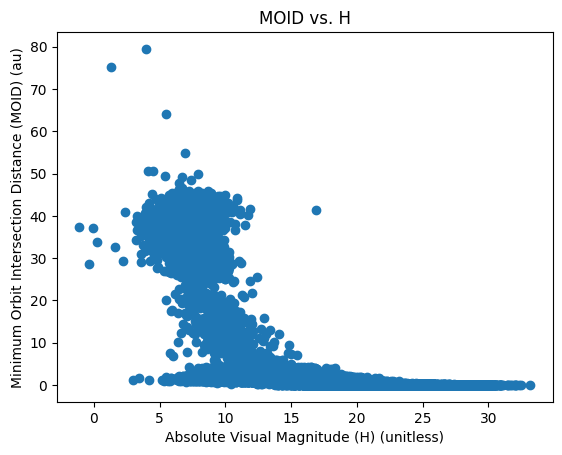

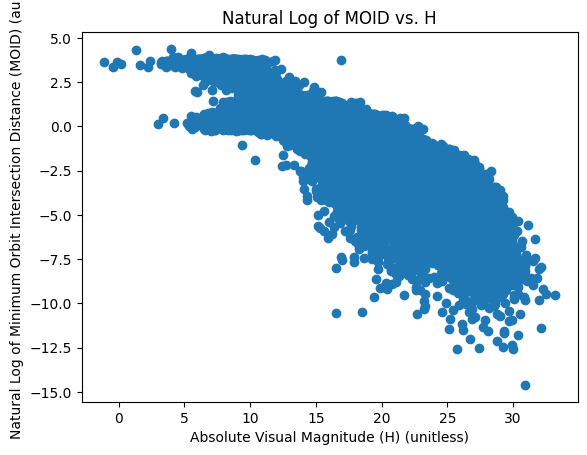

r between H and moid = [[ 1.         -0.43293028]
 [-0.43293028  1.        ]]
r between H and ln(moid) = [[ 1.         -0.71588623]
 [-0.71588623  1.        ]]


In [50]:
# Examines correlations...

# Creates the correlation coefficient matrix and retrieves the last column.
moid_col_index = col_to_num["moid"] # 30
other_col_indices = np.r_[0:moid_col_index, moid_col_index+1:dataset.shape[1]]
# print(f"moid_col_index = {moid_col_index}")
# print(f"other_col_indices = {other_col_indices}")
moid_col = dataset[:, moid_col_index]
other_cols = dataset[:, other_col_indices]
corr_coeff_matrix = np.corrcoef(other_cols.T, moid_col)
# print(f"corr_coeff_matrix = \n{corr_coeff_matrix}")
corr_coeffs = corr_coeff_matrix[:, -1]
print(f"corr_coeffs = {list(corr_coeffs)}")
print(f"corr_coeffs.shape = {corr_coeffs.shape}")

# This takes a column number and returns the index of (the value that
# corresponds to that column) in the last column of the correlation coefficient
# matrix. This is only necessary because the correlation coefficient matrix
# makes it so that the MOID attribute's correlation (with itself) is the last
# value in the array holding all the variables' correlations with the MOID,
# so all the columns after column 30 (the MOID column) are pushed down by 1.
mapper = lambda x : (
    44 if x == col_to_num["moid"] else
    x if x < col_to_num["moid"] else
    x - 1
)

# Looks at which columns correlate most strongly with MOID.
# The unusual initialization of the copy of the "cols" array was done
# because there were (seemingly) randomly occurring issues with the ordering
# resulting from the sorting of the column names based on their r-values
# across different runs and runtime sessions on Google Colab.
cols_sorted_by_abs_r = list(set(list(set(cols))))
cols_sorted_by_abs_r.sort(key=lambda x : -abs(corr_coeffs[mapper(col_to_num[x])]))
print(f"variables sorted by strength of correlation with MOID = \n\t{cols_sorted_by_abs_r}")

# Prints out the 10 variables most strongly correlating with the MOID, skipping
# the MOID itself (and itself in different units).
print("\nTop 10 Asteroid Attributes by Their Correlation with MOID")
for i in range(0, 12):
    col_name = cols_sorted_by_abs_r[i]
    print(f"variable: {col_name}".ljust(20),
          f"| corr coeff: {corr_coeffs[mapper(col_to_num[col_name])]}")
print()

# Plots MOID vs. absolute visual magnitude.
import matplotlib.pyplot as plt
H_col = dataset[:, col_to_num["H"]]
moid_col = dataset[:, moid_col_index]
plt.scatter(H_col, moid_col)
plt.xlabel('Absolute Visual Magnitude (H) (unitless)')
plt.ylabel('Minimum Orbit Intersection Distance (MOID) (au)')
plt.title('MOID vs. H')
plt.show()
plt.scatter(H_col, np.log(moid_col))
plt.xlabel('Absolute Visual Magnitude (H) (unitless)')
plt.ylabel('Natural Log of Minimum Orbit Intersection Distance (MOID) (au)')
plt.title('Natural Log of MOID vs. H')
plt.show()
print(f"r between H and moid = {np.corrcoef(H_col, moid_col)}")
print(f"r between H and ln(moid) = {np.corrcoef(H_col, np.log(moid_col))}")

In [51]:
# Shuffles the dataset.
np.random.shuffle(dataset)
np.random.shuffle(dataset)

In [52]:
# Takes a subset of the dataset to obtain a more balanced distribution.

moid_col_index = 30 # col_to_num["moid"]
moid_col = dataset[:, moid_col_index]
leq_0p05 = moid_col < 0.05

rows_leq = dataset[leq_0p05]
rows_greater = dataset[~leq_0p05]
np.random.shuffle(rows_leq)
np.random.shuffle(rows_greater)

rows_greater_reduced = rows_greater[:rows_leq.shape[0]]
dataset = np.concatenate((rows_leq, rows_greater_reduced), axis=0)
np.random.shuffle(dataset)

In [53]:
# Replaces the MOID values with their natural log.
dataset[:, moid_col_index] = np.log(dataset[:, moid_col_index])

In [54]:
# Prepares the data to be used for training.

# Obtains only the columns desired for the input to the model and puts them
# all together into a 2D array, putting the "label" or "y" column (the MOID
# values) as the rightmost column of the returned 2D array.
def select_columns(dataset, input_cols, output_col):
    input_data = dataset[:, input_cols]
    output_data = dataset[:, output_col]
    output_data = np.reshape(output_data, (-1, 1))
    one_big_block = np.concatenate((input_data, output_data), axis=1)
    return one_big_block

# Splits the data for training/cross-validation/testing.
# (The cross-validation dataset was later not used.)
def split_data(dataset, split):
    train_proportion, cross_val_proportion, test_proportion = split
    assert train_proportion + cross_val_proportion + test_proportion == 1
    num_rows = len(dataset)
    cross_val_index = int(train_proportion * num_rows)
    test_index = int((train_proportion + cross_val_proportion) * num_rows)
    # print(f"cross_val_index = {cross_val_index}, test_index = {test_index}")
    # print(dataset.shape)

    num_cols = len(dataset[0])
    x_train = dataset[0:cross_val_index, :-1]
    y_train = dataset[0:cross_val_index, -1]
    x_cross_val = dataset[cross_val_index:test_index, :-1]
    y_cross_val = dataset[cross_val_index:test_index, -1]
    x_test = dataset[test_index:num_rows, :-1]
    y_test = dataset[test_index:num_rows, -1]
    # print(f"x_train.shape = {x_train.shape}")
    print(f"x_train = {x_train}")
    # print(f"y_train.shape = {y_train.shape}")
    # print(f"y_train = {y_train}")
    # print(f"x_cross_val.shape = {x_cross_val.shape}")
    # print(f"y_cross_val.shape = {y_cross_val.shape}")
    # print(f"x_test.shape = {x_test.shape}")
    # print(f"y_test.shape = {y_test.shape}")

    return ((x_train, y_train), (x_cross_val, y_cross_val), (x_test, y_test))

# Modifies the dataset to only use the desired columns.
priority_cols = ['H', 'n', 'sigma_q', 'e', 'sigma_e', 'tp', 'a', 'epoch_mjd',
                 'epoch', 'epoch_cal']
priority_col_indices = np.array([col_to_num[col_name] for col_name in priority_cols])
moid_col_index = 30 # col_to_num["moid"]
reduced_dataset = select_columns(dataset, priority_col_indices, moid_col_index)
print(f"reduced_dataset.shape = {reduced_dataset.shape}")

# Scales the dataset's values down to use them more effectively in training.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_dataset = scaler.fit_transform(reduced_dataset)
# print(f"scaled_dataset.shape = {scaled_dataset.shape}")
# print(f"scaled_dataset = \n{scaled_dataset}")
# unscaled_dataset = scaler.inverse_transform(scaled_dataset)
# print(f"inverted dataset = \n{unscaled_dataset}")
# print(f"original dataset = \n{dataset}")

# Actually performs the splitting of data here.
(x_train, y_train), (x_cross_val, y_cross_val), (x_test, y_test) = split_data(scaled_dataset, (0.8, 0.1, 0.1))
print(f"x_train.shape = {x_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"x_cross_val.shape = {x_cross_val.shape}")
print(f"y_cross_val.shape = {y_cross_val.shape}")
print(f"x_test.shape = {x_test.shape}")
print(f"y_test.shape = {y_test.shape}")

# for i in range(len(dataset)):
#   if dataset[i][col_to_num["moid"]] < 0.05:
#     print(f"i = {i}, {dataset[i][col_to_num['moid']]}")


reduced_dataset.shape = (22248, 11)
x_train = [[-4.32375000e-01 -3.79951839e-01 -9.82850356e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.32375000e-01 -2.19649997e-01 -9.77815120e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.30125000e-01  6.37096338e-01  6.82182260e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-3.82375000e-01 -1.93786439e-01 -1.04861952e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.92625000e-01 -1.32009521e-01  4.25033233e-01 ... -2.73000000e+02
  -2.73000000e+02 -9.63000000e+03]
 [ 1.19262500e+00  7.79432954e-02  1.40409955e+02 ... -1.07260000e+04
  -1.07260000e+04 -2.90413000e+05]]
x_train.shape = (17798, 10)
y_train.shape = (17798,)
x_cross_val.shape = (2225, 10)
y_cross_val.shape = (2225,)
x_test.shape = (2225, 10)
y_test.shape = (2225,)


In [73]:
# Builds the deep neural network (DNN).

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation="sigmoid", input_shape=(10,)),
    tf.keras.layers.Dense(32, activation="sigmoid"),
    tf.keras.layers.Dense(16, activation="sigmoid"),
    tf.keras.layers.Dropout(0.5, seed=SEED),
    tf.keras.layers.Dense(1)
])

print(model.summary())

predictions = model(x_train).numpy()
print(predictions)
print(type(predictions))
print(predictions.shape)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                176       
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1265 (4.94 KB)
Trainable params: 1265 (4.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
[[0.5143744 ]
 [0

In [74]:
# Trains the DNN model.

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)
history = model.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_cross_val, y_cross_val)
)
print("training done ✅")

Epoch 1/15
279/279 [==============================] - 2s 4ms/step - loss: 0.1520 - val_loss: 0.0720
Epoch 2/15
279/279 [==============================] - 1s 3ms/step - loss: 0.1112 - val_loss: 0.0763
Epoch 3/15
279/279 [==============================] - 1s 3ms/step - loss: 0.1077 - val_loss: 0.0846
Epoch 4/15
279/279 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.0639
Epoch 5/15
279/279 [==============================] - 1s 3ms/step - loss: 0.1033 - val_loss: 0.0808
Epoch 6/15
279/279 [==============================] - 1s 3ms/step - loss: 0.1084 - val_loss: 0.0842
Epoch 7/15
279/279 [==============================] - 1s 4ms/step - loss: 0.1071 - val_loss: 0.0666
Epoch 8/15
279/279 [==============================] - 1s 5ms/step - loss: 0.1069 - val_loss: 0.0633
Epoch 9/15
279/279 [==============================] - 1s 5ms/step - loss: 0.1061 - val_loss: 0.0958
Epoch 10/15
279/279 [==============================] - 1s 4ms/step - loss: 0.1071 - val_loss: 0.0682

In [75]:
# Evaluates the model on the testing dataset.

test_loss = model.evaluate(x_test, y_test)
print(f"test loss = {test_loss}")

70/70 [==============================] - 0s 2ms/step - loss: 0.0698
test loss = 0.06977333873510361


In [76]:
# Makes predictions to view.

predictions = model.predict(x_test)
print(predictions)
distinct = dict()
for prediction in predictions:
    if prediction[0] not in distinct:
        distinct[prediction[0]] = 0
    distinct[prediction[0]] += 1
print(f"number of distinct predictions = {len(distinct)}")

70/70 [==============================] - 0s 2ms/step
[[ 0.6094918 ]
 [ 0.74140894]
 [-0.3581371 ]
 ...
 [ 0.6817745 ]
 [-0.25036466]
 [-0.25543213]]
number of distinct predictions = 1788


In [77]:
# Brings the predictions and labels for the testing dataset back to their original scale.
unscaled_y_test = scaler.inverse_transform(np.concatenate((x_test, np.reshape(y_test, (-1, 1))), axis=1))[:, -1]
unscaled_predictions = scaler.inverse_transform(np.concatenate((x_test, np.reshape(predictions, (-1, 1))), axis=1))[:, -1]

In [78]:
# Undoes the natural log transformation for the predictions and labels.
unscaled_y_test = np.exp(unscaled_y_test)
unscaled_predictions = np.exp(unscaled_predictions)

In [83]:
print(min(unscaled_predictions))
print(max(unscaled_predictions))
print(min(unscaled_y_test))
print(max(unscaled_y_test))

0.009940230307283327
2.151632979224541
4.350919999999996e-06
36.05100000000002


In [79]:
# Calculates some regression evaluation metrics.

unscaled_y_test_mean = np.sum(unscaled_y_test) / len(unscaled_y_test)
# print(unscaled_y_test_mean)
mse = 0.0
mae = 0.0
sum_sq_res = 0.0
sum_sq_total = 0.0

for i in range(len(x_test)):
    mse += (unscaled_y_test[i] - unscaled_predictions[i]) ** 2
    mae += abs(unscaled_y_test[i] - unscaled_predictions[i])
    sum_sq_res += (unscaled_y_test[i] - unscaled_predictions[i]) ** 2
    sum_sq_total += (unscaled_y_test[i] - unscaled_y_test_mean) ** 2
mse /= len(x_test)
mae /= len(x_test)
# print(f"mse = {mse}")
rmse = mse ** (1/2)
r2 = 1 - (sum_sq_res / sum_sq_total)

print(f"Root Mean Squared Error = {rmse}")
print(f"Mean Absolute Error = {mae}")
print(f"Coefficient of Determination = {r2}")

Root Mean Squared Error = 0.9978321093052058
Mean Absolute Error = 0.1876733321348815
Coefficient of Determination = 0.33412736396802334


In [80]:
# Calculates some classification evaluation metrics.

unscaled_predictions = unscaled_predictions.reshape(-1)
unscaled_y_test_binary = np.array(unscaled_y_test <= 0.05)
unscaled_predictions_binary = np.array(unscaled_predictions <= 0.05)
# print(unscaled_y_test_binary)
# print(unscaled_predictions_binary)

false_positives = 0.0
false_negatives = 0.0
true_positives = 0.0
true_negatives = 0.0
for i in range(len(x_test)):
    if unscaled_predictions_binary[i]:
        if unscaled_y_test_binary[i]:
            true_positives += 1
        else:
            false_positives += 1
    else:
        if unscaled_y_test_binary[i]:
            false_negatives += 1
        else:
            true_negatives += 1
accuracy = (true_positives + true_negatives) / \
    (true_positives + true_negatives + false_positives + false_negatives)
print(f"accuracy = {accuracy}")
print(f"FN = {false_negatives}, FP = {false_positives}, TP = {true_positives}")
precision = true_positives / (true_positives + false_positives)
# precision = 0.0000000001
recall = true_positives / (true_positives + false_negatives)
# recall = 0.0000000001
print(f"precision = {precision}")
print(f"recall = {recall}")
f1_score = 2 / ((1 / precision) + (1 / recall))
print(f"F1-Score = {f1_score}")

accuracy = 0.9793258426966293
FN = 1.0, FP = 45.0, TP = 1126.0
precision = 0.9615713065755764
recall = 0.9991126885536823
F1-Score = 0.979982593559617


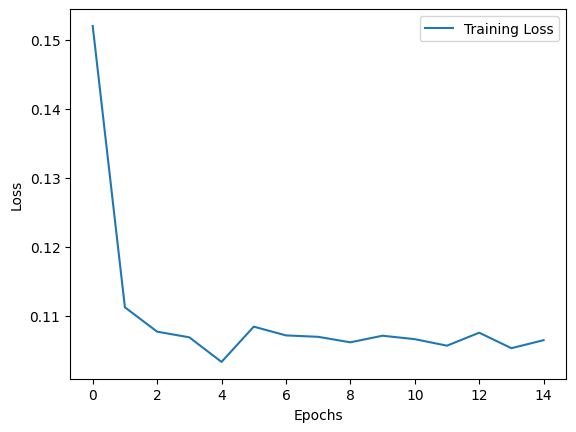

{'loss': [0.15198764204978943, 0.11118905991315842, 0.10765654593706131, 0.10683497786521912, 0.10326912999153137, 0.10838265717029572, 0.10711470991373062, 0.10690703243017197, 0.10611074417829514, 0.10706903040409088, 0.10656754672527313, 0.10562438517808914, 0.10750717669725418, 0.10525904595851898, 0.10642445832490921], 'val_loss': [0.07196322083473206, 0.07625163346529007, 0.08457181602716446, 0.06388573348522186, 0.08078362792730331, 0.08421751856803894, 0.06657317280769348, 0.06333165615797043, 0.09575974196195602, 0.06819363683462143, 0.06706593930721283, 0.06053090840578079, 0.0680285096168518, 0.06819310784339905, 0.0675421804189682]}
<class 'dict'>


In [81]:
# Creates graphs of the training loss and accuracy.

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(history.history)
print(type(history.history))

The remaining cells were mainly used for testing.

In [82]:
# Finds the distribution of the MOID values.

minimum = 1000000.0
maximum = 0.0
for i in range(1, len(dataset)):
    moid = dataset[i][col_to_num["moid"]]
    minimum = min(minimum, moid)
    maximum = max(maximum, moid)
print(f"min = {minimum}, max = {maximum}")

min = -14.604261561437463, max = 4.006015954428407


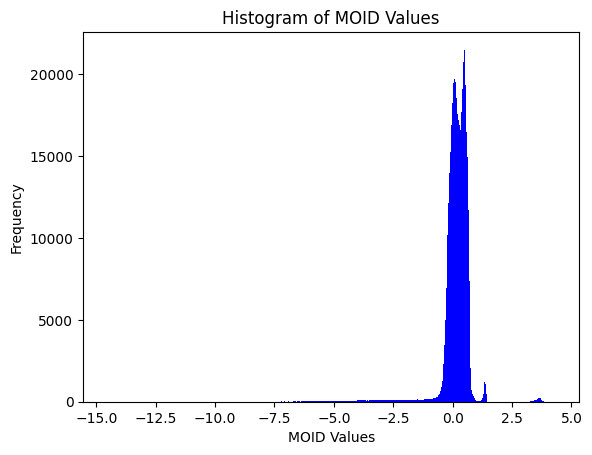

<ipython-input-19-759e766028f4>:27: RuntimeWarning: divide by zero encountered in log
  plt.hist(np.log(moids), bins=1000, color="blue")
<ipython-input-19-759e766028f4>:27: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(moids), bins=1000, color="blue")


ValueError: supplied range of [-inf, 1.476012260210004] is not finite

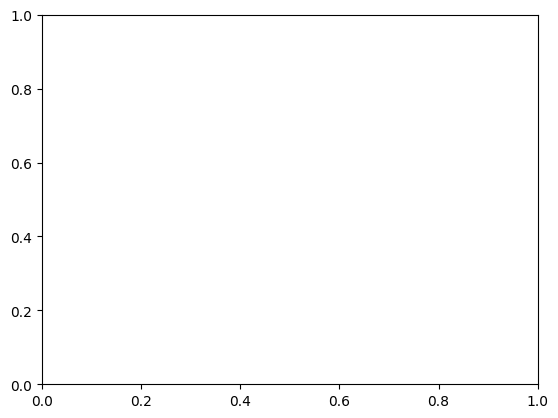

In [19]:
# Shows the distribution of the MOID values.

import matplotlib.pyplot as plt

def summary(data):
    print(f"Mean: {np.mean(data)}")
    print(f"Standard deviation: {np.std(data)}")

    summary_parts = ["Minimum", "1st Quartile", "Median", "3rd Quartile", "Maximum"]
    for i in range(5):
        print(f"{summary_parts[i]}: {np.percentile(data, 25 * i)}")
    print(f"Range: {np.max(data) - np.min(data)}")

    z_scores = np.zscore(data)
    print(f"Minimum z-score: {min(z_scores)}")
    print(f"Maximum z-score: {max(z_scores)}")

moids = dataset[:, col_to_num["moid"]]
# print(len(moids))
# summary(moids)
plt.hist(moids, bins=1000, color="blue")
plt.xlabel('MOID Values')
plt.ylabel('Frequency')
plt.title('Histogram of MOID Values')
plt.show()

plt.hist(np.log(moids), bins=1000, color="blue")
plt.xlabel('Natural Log of MOID Values')
plt.ylabel('Frequency')
plt.title('Histogram of MOID Values on a Logarithmic Scale')
plt.show()

In [65]:
# Counts the number of MOIDs less than 0.05 au.

# data = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = data.load_data()
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
# # for i in range(100):
# #     print(f"x_test[{i}] = {x_test}")
# print(type(x_train))
# print(type(y_test.shape))

count = 0
for i in range(len(dataset)):
    if dataset[i][col_to_num["moid"]] < 0.05:
        count += 1
print(count)
print(count/len(dataset))
# a = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])
# print(a)
# np.random.shuffle(a)
# print(a)



14694
0.6604638619201726
